# Analysing which variables contribute the most for the Blue Team to Win.

## Importing Libraries & importing the csv data file

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing and defining Data Frame
df = pd.read_csv('high_diamond_ranked_10min.csv')

## Checking the Data Frame info and first look of the data/descriptive statistics

In [3]:
# cheking info of the df
def data_inv(df):
    print('dataframe: ',df.shape[0])
    print('dataset variables: ',df.shape[1])
    print('-'*10)
    print('dateset columns: \n')
    print(df.columns)
    print('-'*10)
    print('data-type of each column: \n')
    print(df.dtypes)
    print('-'*10)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_inv(df)

dataframe:  9879
dataset variables:  40
----------
dateset columns: 

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')
----------
data-type of each column: 

gameId                            int64
blueWins           

In [4]:
# checking the df:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
# creating a copy/checkpoint before deleting unnecessary columns
df_1 = df.copy()

## Cleaning the Data Frame

In [6]:
#dropping columns
df_1 = df_1.drop(['blueGoldDiff', 'blueExperienceDiff','redGoldDiff',
       'redExperienceDiff','gameId'], axis=1)

In [7]:
#check number of diferent values
df_1.nunique()

blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
redEliteMonsters                   3
redDragons                         2
redHeralds                         2
r

In [8]:
#the probability of blue team winning is inversely correlated with red team, so the task is to analyse the Blue Team.
df_blue = df_1.drop(['redWardsPlaced','redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'], axis=1)

## Plotting some graphs to better visualize the data

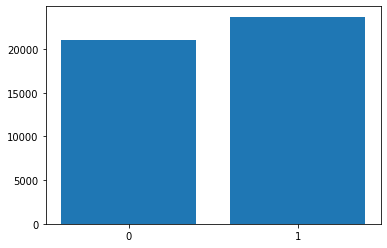

In [9]:
x = df_blue['blueWins']
y = df_blue['blueTotalGold']
plt.bar(x, y)
plt.xticks(range(0,2))
plt.show()

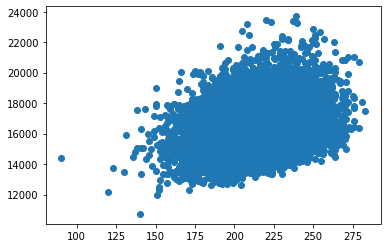

In [10]:
# Total Gold vs Total minions killed, as we can see more minions killed doesn't equate more gold 
x1 = df_blue['blueTotalMinionsKilled']
y1 = df_blue['blueTotalGold']
plt.scatter(x1, y1)
plt.show()

In [11]:
# correlation between the variables,
# To avoid Multicollinearity, the independent variables must not be over 0,7 correlation or the regression output will 
        # be erroneous, for example: Blue Kills is highly correlated with Blue Assists, and one must be omitted from the model
corr = df_blue.corr()

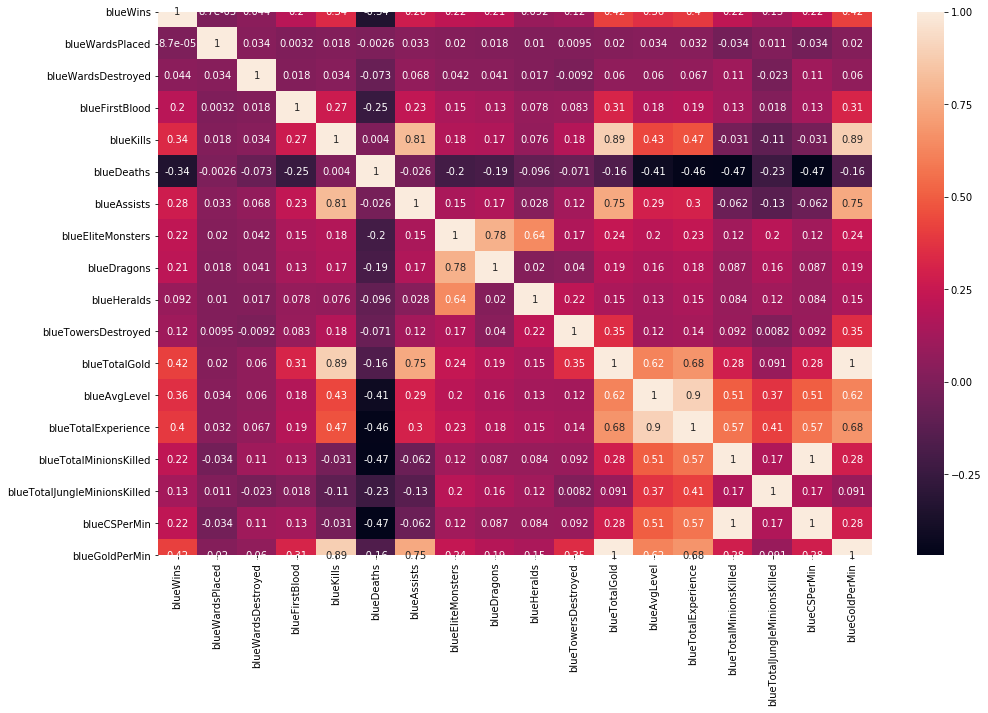

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot =  True)

## Standardizing the data 

In [13]:
# creating an input table with only the independent variables, ommiting the correlating ones,
# creating the target variable = Blue Wins
df_blue.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueCSPerMin', 'blueGoldPerMin'],
      dtype='object')

In [14]:
unscaled_inputs = df_blue.filter(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths','blueEliteMonsters','blueHeralds', 'blueTowersDestroyed','blueAvgLevel','blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled'], axis=1)
target = df_blue.filter(['blueWins'])

Scale just the non categorical variables, in this case 'Blue first Blood' is categorical

In [16]:
# import the libraries needed to create the Custom Scaler
# note that all of them are a part of the sklearn package
# moreover, one of them is actually the StandardScaler module, 
# so you can imagine that the Custom Scaler is build on it

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [17]:
# categorical columns to omit
columns_to_omit = ['blueFirstBlood']

In [18]:
# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [19]:
blue_scaler = CustomScaler(columns_to_scale)

In [20]:
blue_scaler.fit(unscaled_inputs)

CustomScaler(columns=['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills',
                      'blueDeaths', 'blueEliteMonsters', 'blueHeralds',
                      'blueTowersDestroyed', 'blueAvgLevel',
                      'blueTotalMinionsKilled',
                      'blueTotalJungleMinionsKilled'],
             copy=None, with_mean=None, with_std=None)

In [21]:
scaled_inputs = blue_scaler.transform(unscaled_inputs)
scaled_inputs

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueEliteMonsters,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled
0,0.316996,-0.379275,1,0.935301,-0.046926,-0.879231,-0.481132,-0.210439,-1.035635,-0.992782,-1.465951
1,-0.570992,-0.839069,0,-0.393216,-0.387796,-0.879231,-0.481132,-0.210439,-1.035635,-1.953558,-0.758722
2,-0.404494,-1.298863,0,0.271042,1.657424,0.719503,-0.481132,-0.210439,-1.691092,-1.404543,-0.455624
3,1.149484,-0.839069,0,-0.725346,-0.387796,0.719503,2.078430,-0.210439,0.275280,-0.718275,0.453671
4,2.925460,0.540312,0,-0.061087,-0.046926,-0.879231,-0.481132,-0.210439,0.275280,-0.306513,0.655736
...,...,...,...,...,...,...,...,...,...,...,...
9874,-0.293496,-0.379275,1,0.271042,-0.728666,0.719503,-0.481132,-0.210439,0.930738,-0.260762,1.868129
9875,1.759976,-1.298863,0,-0.061087,-0.728666,0.719503,-0.481132,-0.210439,0.930738,0.745765,-0.253559
9876,0.039499,-0.839069,0,-0.061087,0.293944,-0.879231,-0.481132,-0.210439,0.275280,-0.306513,-0.556657
9877,-0.459994,0.540312,1,-1.389604,-1.069536,0.719503,-0.481132,-0.210439,-1.035635,0.334004,-0.253559


## Test, Train and Split the data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_test_split(scaled_inputs, target)

[      blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
 2979         1.926474            0.540312               1   3.592335   
 5775        -0.792989           -0.379275               1   0.271042   
 8960        -0.126998            1.000106               1   0.935301   
 7340        -0.404494           -0.839069               1   0.935301   
 9401        -0.348995           -0.839069               0  -1.389604   
 ...               ...                 ...             ...        ...   
 3111        -0.348995           -0.379275               0  -1.057475   
 7364        -0.404494           -0.379275               1   1.267430   
 566         -0.182498            0.540312               1   0.271042   
 4008        -0.404494            0.080519               0  -0.393216   
 8554        -0.570992            0.080519               1   1.931689   
 
       blueDeaths  blueEliteMonsters  blueHeralds  blueTowersDestroyed  \
 2979   -0.387796          -0.879231    -0.48113

In [24]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, train_size=0.8, random_state=20)

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [26]:
reg = LogisticRegression()

In [27]:
reg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Regression score
reg.score(x_train, y_train)

0.7190940149310389

In [29]:
# The Intercept
intercept = reg.intercept_
intercept

array([-0.08515058])

In [30]:
# Creating a Summary Table to visualize the Variable and respective Coefficients and Odds Ratio
variables = unscaled_inputs.columns.values
variables

array(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueEliteMonsters', 'blueHeralds',
       'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled'], dtype=object)

In [31]:
summary_table = pd.DataFrame(columns=['Variables'], data = variables)
summary_table['Coef'] = np.transpose(reg.coef_)
# add the intercept at index 0
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# calculate the Odds Ratio and add to the table
summary_table['Odds Ratio'] = np.exp(summary_table.Coef)

In [32]:
summary_table.sort_values(by=['Odds Ratio'], ascending=False)

,Variables,Coef,Odds Ratio
4,blueKills,0.842590,2.322375
6,blueEliteMonsters,0.273732,1.314862
10,blueTotalMinionsKilled,0.191418,1.210966
11,blueTotalJungleMinionsKilled,0.186707,1.205274
3,blueFirstBlood,0.142588,1.153255
8,blueTowersDestroyed,0.100111,1.105294
9,blueAvgLevel,0.099055,1.104127
2,blueWardsDestroyed,0.007085,1.007110
1,blueWardsPlaced,-0.013567,0.986524
0,Intercept,-0.085151,0.918374


## Calculating P-values

In [33]:
import statsmodels.api as sm
x = sm.add_constant(x_train)
logit_model=sm.Logit(y_train,x)
result=logit_model.fit()
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.543846
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               blueWins   No. Observations:                 7903
Model:                          Logit   Df Residuals:                     7891
Method:                           MLE   Df Model:                           11
Date:                Fri, 24 Apr 2020   Pseudo R-squ.:                  0.2154
Time:                        10:58:08   Log-Likelihood:                -4298.0
converged:                       True   LL-Null:                       -5477.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0851      0.038     -2.216      0.027

# Conclusions

1- The Variables "Blue Wards Placed", "Blue Wards Destroyed"have no statistical significance, so the next step is to remove them from the model

2- The Variable that has the biggest impact in the odds of winning is the number of Kills for the Blue Team, for every Kill the odds increase by 132%.
    
3- The Second variable that impacts the outcome is, as expected, the number of Deaths, this time it impacts negatively:for every Death, the odds of winning decreases by 50% for the Blue team
    
4- Surprizingly, killing Heralds decreases the odds of winning by about 12%

5- Killing Elite monsters and Total minions killed are the next biggest impact in winning with 30% and 20% increase, respectively

## Testing the data

In [34]:
# testing the data is important to evalute the accuracy on a dataset that the model has never seen, to see if it's Overfitting
  # a test score 10% below the training reveals an overfitting
reg.score(x_test, y_test)

0.7186234817813765

In [38]:
predicted_prob = reg.predict_proba(x_test)
predicted_prob[:,1]

array([0.43689325, 0.12001984, 0.80149566, ..., 0.62698481, 0.5040176 ,
       0.42954814])

In [51]:
df_blue['predicted'] = reg.predict_proba(scaled_inputs)[:,1]

In [52]:
df_blue

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueCSPerMin,blueGoldPerMin,predicted
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,19.5,1721.0,0.526932
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,17.4,1471.2,0.277203
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,18.6,1611.3,0.213677
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,20.1,1515.7,0.360231
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,21.0,1640.0,0.438851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,21.1,1776.5,0.806766
9875,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,23.3,1623.8,0.683273
9876,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,21.0,1590.3,0.335892
9877,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,22.4,1445.9,0.450277
